# Data Science on Loan Data

#### Pierre-Charles Paret-Van Wolput

### Imports

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
import itertools

In [2]:
df = pd.read_csv('loan.csv', usecols = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status'])

### Data exploration

In [3]:
df.head(10)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,Fully Paid,27.65,13648.0,5861.071414
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,Charged Off,1.00,1687.0,1008.710000
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,Fully Paid,8.72,2956.0,3003.653644
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,Fully Paid,20.00,5598.0,12226.302212
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,Current,17.94,27783.0,3242.170000
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,Fully Paid,11.20,7963.0,5631.377753
6,7000.0,7000.0,60 months,15.96,C,47004.0,Dec-2011,Current,23.51,17726.0,8136.840000
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,Fully Paid,5.35,8221.0,3938.144334
8,5600.0,5600.0,60 months,21.28,F,40000.0,Dec-2011,Charged Off,5.55,5210.0,646.020000
9,5375.0,5375.0,60 months,12.69,B,15000.0,Dec-2011,Charged Off,18.08,9279.0,1476.190000


In [4]:
df.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,8.873790e+05,887379.000000
mean,14755.264605,14741.877625,13.246740,7.502759e+04,18.157039,1.692079e+04,7558.826684
std,8435.455601,8429.897657,4.381867,6.469830e+04,17.190626,2.242679e+04,7871.243336
min,500.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,6.443000e+03,1914.590000
50%,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,1.187500e+04,4894.999117
75%,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,2.082900e+04,10616.814231
max,35000.000000,35000.000000,28.990000,9.500000e+06,9999.000000,2.904836e+06,57777.579870


#### Missing values

In [5]:
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percents = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data_synthesis = pd.concat([missing_total, missing_percents], axis=1, keys=['Total', 'Percentage'])
missing_data_synthesis

,Total,Percentage
annual_inc,4,0.000005
total_pymnt,0,0.000000
revol_bal,0,0.000000
dti,0,0.000000
loan_status,0,0.000000
issue_d,0,0.000000
grade,0,0.000000
int_rate,0,0.000000
term,0,0.000000
funded_amnt,0,0.000000


Based on the description of the continuous variables in  dataframe, one can see there only missing values reported as such in the annual_inc column. And there are 4 of them.

There could be two strategies here for the missing values then:
    
    -remove the rows that contain a missing value.
    
    -replace them by the mean, median or other measures based on the rest of the series. 

Considering the low number of rows with missing values compared to the total, I will drop them.

In [6]:
df.dropna(inplace=True)

#### Distributions

We have continuous and categorical variables. 

Let's look at the histograms of the continuous variables and bar diagrams for categorical ones.

In [7]:
list_columns = df.columns.values.tolist()

In [8]:
#scatter_matrix(df[list_columns], alpha=0.2, figsize=(8, 8), diagonal='hist')
#plt.show()
#the corresponding file is in the zip under name 'Distributions&ScatterPlots.png'

The cell above gives interesting results but is very long to charge so maybe not the best option. The result is after this.

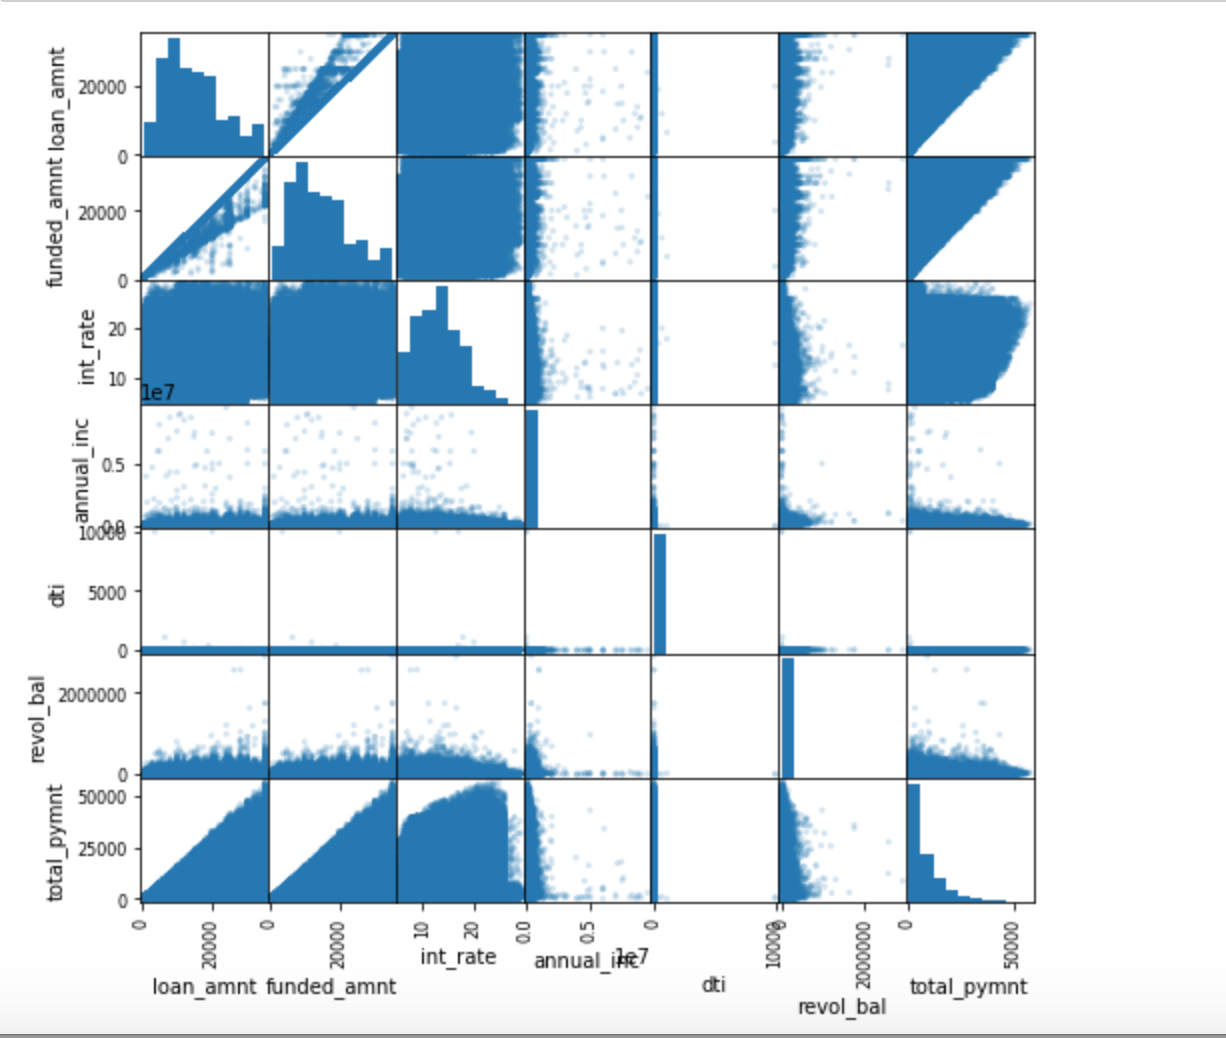

In [9]:
#scatter matrix plot for numerical variables
Image(filename = 'Distributions&ScatterPlots.png', width=900, height=900)

In [10]:
#scatterplot
#sns.set()
#cols = list_columns
#sns.pairplot(df[cols], size = 2.5)
#plt.show()

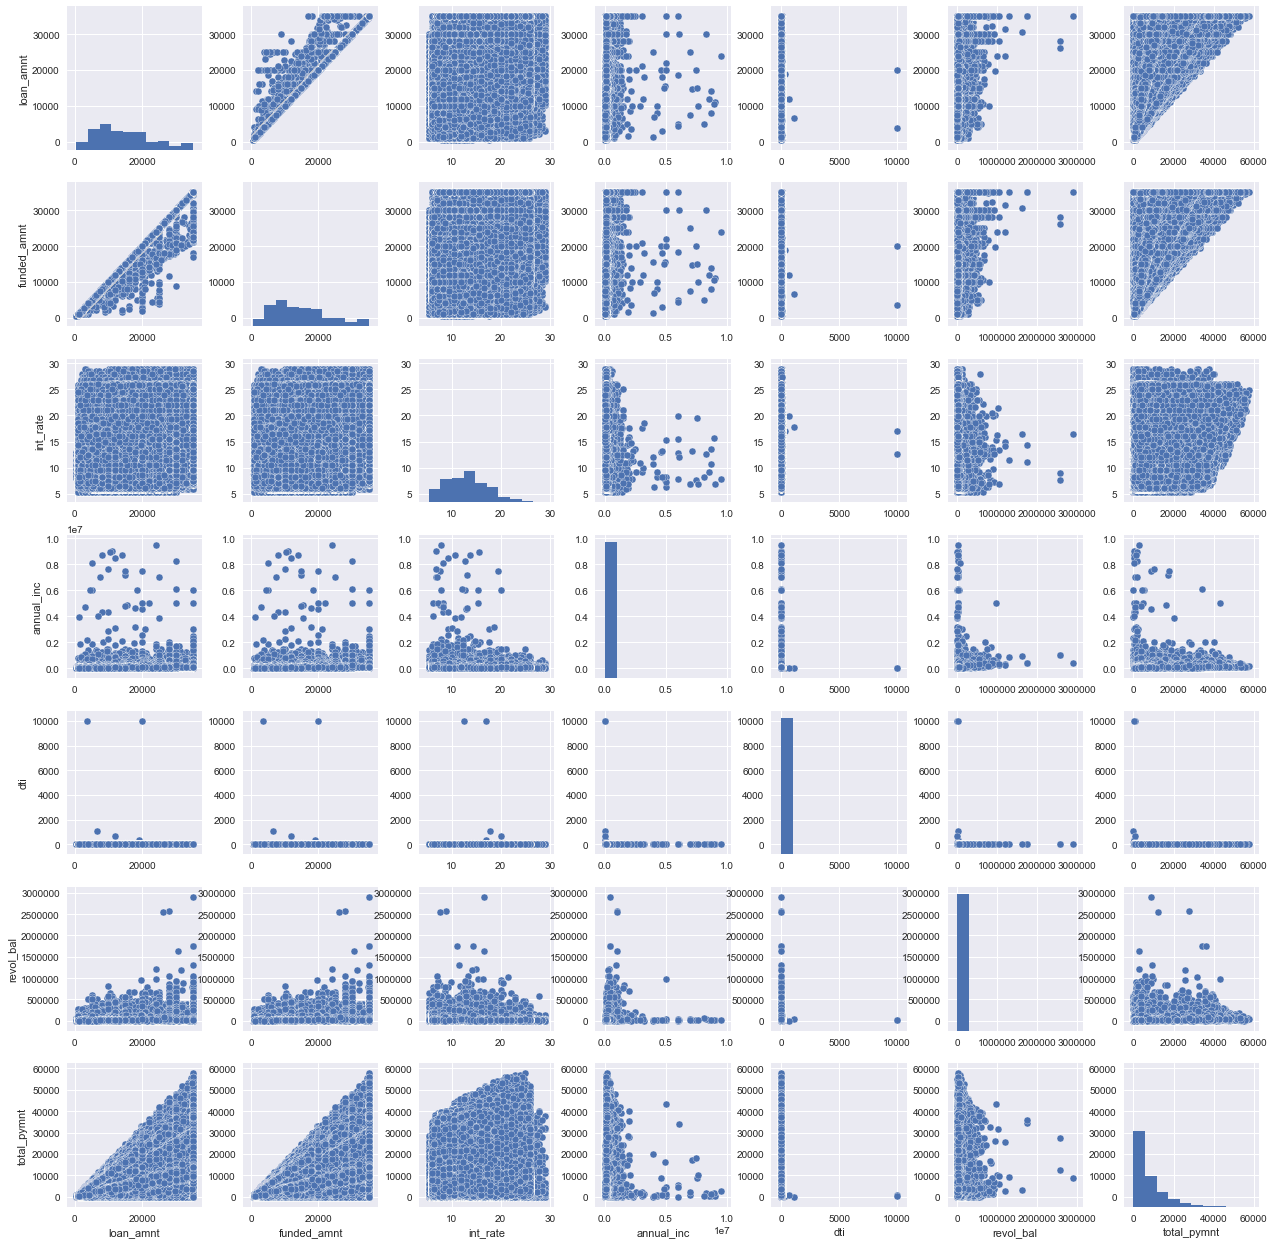

In [11]:
#pairplots numerical variables
Image(filename = 'Pairplots.png', width=900, height=900)

Again, this plot is long to load so I provided a picture for it. It is bettee than the scatter matrix and one does not seem to have outliers based on the distribution of the different features. (Otherwise, we would see holes in the feature histograms.) 

All the features that are continuous seemed to have distributions that are definitely positively skewed, far from any kind of normal distribution.

dti, revol_bal and annual_inc have distributions that are not appropriately represented in this scatter_matrix I think.

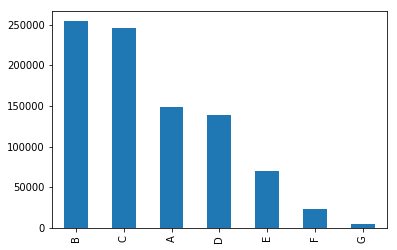

In [12]:
df['grade'].value_counts().plot(kind='bar')
plt.show()

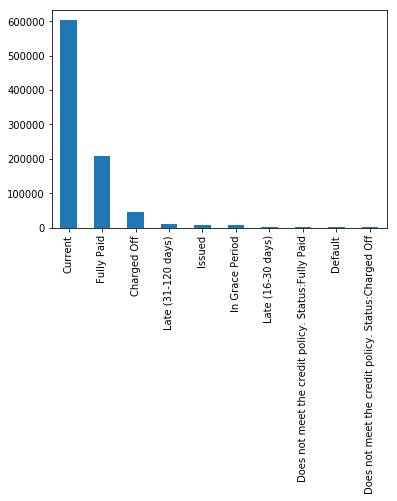

In [13]:
df['loan_status'].value_counts().plot(kind='bar')
plt.show()

In [14]:
df['issue_datetime'] = pd.to_datetime(df['issue_d'])

In [15]:
df['issue_year'] = pd.DatetimeIndex(df['issue_datetime']).year

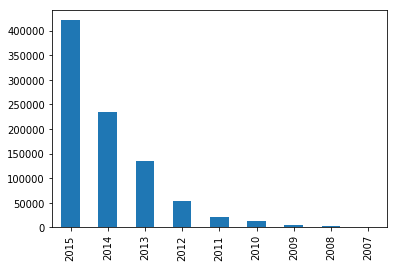

In [16]:
df['issue_year'].value_counts().plot(kind='bar')
plt.show()

There are definitely many more loans in the recent periods in this data than further in the past, hence many must still be active.

Let's look at the correlation between the different variables present in the df as well.

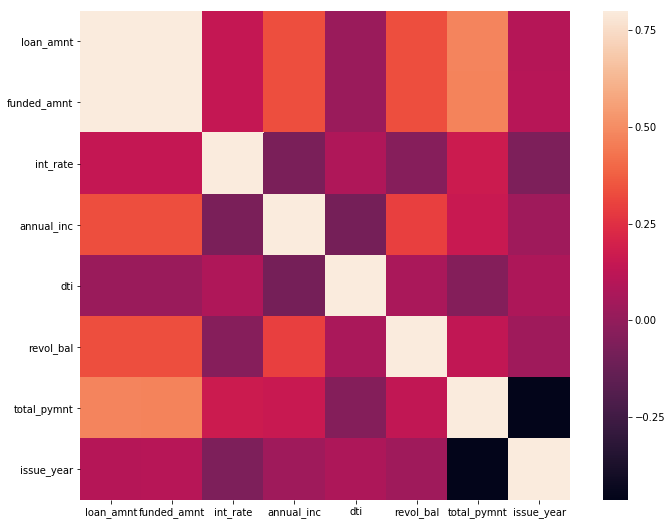

In [17]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

When providing a quick study of the correlation between the variables, one sees a very strong correlation between funded_amnt and loan_amnt. We will need to check that in the modelling and will most likely have to remove one of the variables or used penalized regression. Based on the very high value, I tend to think now that removing one of the variables would be the best. The rest of the correlations is definitely not going to be a problem.

In [ ]:
#saleprice correlation matrix
cm = np.corrcoef(df[list_columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=list_columns, xticklabels=list_columns)
plt.show()

### Business Analysis

In [18]:
loan_terms = set(df['term'].values)
print(loan_terms)

status_possible_loans = set(df['loan_status'].values)
print(status_possible_loans)

{' 60 months', ' 36 months'}
{'Issued', 'Charged Off', 'In Grace Period', 'Current', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (16-30 days)'}


In [19]:
df_36m = df[df['term'] == ' 36 months']
df_36m.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_datetime,issue_year
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,Fully Paid,27.65,13648.0,5861.071414,2011-12-01,2011
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,Fully Paid,8.72,2956.0,3003.653644,2011-12-01,2011
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,Fully Paid,20.00,5598.0,12226.302212,2011-12-01,2011
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,Fully Paid,11.20,7963.0,5631.377753,2011-12-01,2011
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,Fully Paid,5.35,8221.0,3938.144334,2011-12-01,2011


In [20]:
df_36m.tail()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_datetime,issue_year
887372,12000.0,12000.0,36 months,11.99,B,63000.0,Jan-2015,Current,23.69,21110.0,4766.25,2015-01-01,2015
887373,11575.0,11575.0,36 months,15.59,D,25400.0,Jan-2015,Current,27.08,18266.0,4863.33,2015-01-01,2015
887374,10000.0,10000.0,36 months,11.99,B,31000.0,Jan-2015,Current,28.69,14037.0,3971.88,2015-01-01,2015
887375,24000.0,24000.0,36 months,11.99,B,79000.0,Jan-2015,Current,3.90,8621.0,9532.39,2015-01-01,2015
887378,20000.0,20000.0,36 months,11.99,B,100000.0,Jan-2015,Current,10.83,33266.0,7943.76,2015-01-01,2015


In [21]:
df_36m.drop(df_36m.where(df_36m['loan_status'] == 'Current').dropna().index, axis = 0, inplace=True)
df_36m.drop(df_36m.where(df_36m['loan_status'] == 'Issued').dropna().index, axis = 0, inplace=True)
df_36m

/Users/PCP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/PCP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_datetime,issue_year
0,5000.0,5000.0,36 months,10.65,B,24000.00,Dec-2011,Fully Paid,27.65,13648.0,5861.071414,2011-12-01,2011
2,2400.0,2400.0,36 months,15.96,C,12252.00,Dec-2011,Fully Paid,8.72,2956.0,3003.653644,2011-12-01,2011
3,10000.0,10000.0,36 months,13.49,C,49200.00,Dec-2011,Fully Paid,20.00,5598.0,12226.302212,2011-12-01,2011
5,5000.0,5000.0,36 months,7.90,A,36000.00,Dec-2011,Fully Paid,11.20,7963.0,5631.377753,2011-12-01,2011
7,3000.0,3000.0,36 months,18.64,E,48000.00,Dec-2011,Fully Paid,5.35,8221.0,3938.144334,2011-12-01,2011
11,12000.0,12000.0,36 months,12.69,B,75000.00,Dec-2011,Fully Paid,10.78,23336.0,13943.080000,2011-12-01,2011
12,9000.0,9000.0,36 months,13.49,C,30000.00,Dec-2011,Charged Off,10.08,10452.0,2270.700000,2011-12-01,2011
13,3000.0,3000.0,36 months,9.91,B,15000.00,Dec-2011,Fully Paid,12.56,7323.0,3478.981915,2011-12-01,2011
14,10000.0,10000.0,36 months,10.65,B,100000.00,Dec-2011,Charged Off,7.06,11997.0,7471.990000,2011-12-01,2011
15,1000.0,1000.0,36 months,16.29,D,28000.00,Dec-2011,Fully Paid,20.31,6524.0,1270.171106,2011-12-01,2011


In [22]:
df_36m[df_36m['loan_status'] == 'Late (16-30 days)']

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_datetime,issue_year
43044,12000.0,12000.0,36 months,8.90,A,96000.0,Dec-2013,Late (16-30 days),24.58,10310.0,8763.92,2013-12-01,2013
43169,6075.0,6075.0,36 months,14.98,C,52550.0,Dec-2013,Late (16-30 days),15.21,4865.0,4842.34,2013-12-01,2013
43515,18000.0,18000.0,36 months,14.47,C,50000.0,Dec-2013,Late (16-30 days),12.70,959.0,14306.24,2013-12-01,2013
43859,7000.0,7000.0,36 months,18.25,D,38000.0,Dec-2013,Late (16-30 days),30.45,5509.0,5840.68,2013-12-01,2013
44481,9000.0,9000.0,36 months,14.98,C,110000.0,Dec-2013,Late (16-30 days),7.67,15640.0,7172.68,2013-12-01,2013
44565,7875.0,7875.0,36 months,16.24,C,21000.0,Dec-2013,Late (16-30 days),16.00,8464.0,6389.40,2013-12-01,2013
44566,8400.0,8400.0,36 months,11.99,B,47000.0,Dec-2013,Late (16-30 days),34.30,10999.0,6446.27,2013-12-01,2013
44757,2600.0,2600.0,36 months,17.57,D,35318.0,Dec-2013,Late (16-30 days),11.15,8245.0,2148.82,2013-12-01,2013
44927,27300.0,27300.0,36 months,14.98,C,71000.0,Dec-2013,Late (16-30 days),17.11,17515.0,21758.57,2013-12-01,2013
45293,19000.0,19000.0,36 months,15.61,C,66154.0,Dec-2013,Late (16-30 days),20.26,10576.0,15278.86,2013-12-01,2013


I. Fully paid loans

I am not sure I understood the sentence 'Assume a 36 month investment period for each loan, and exclude loans with less than 36 months of data available.' 

What I did from it is drop all the 60 months loans as well as the 36 months loans that are still current or just issued, since all the data is not available yet. For the late payments, one doesn't know if this is before the term of the loan or not, hence I will consider them as late after the term of the loan in the analysis.

NB: I should maybe have done the filtering using datetimes instead than the status of the loans but how to define 36 months of data available seemed unclear to me.

In [23]:
nb_loans_36m = len(df_36m.index.values)

percentage_fully_paid_loans = ((df_36m['loan_status'] == 'Fully Paid').sum() 
                               + (df_36m['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid').sum())/nb_loans_36m

In [24]:
percentage_fully_paid_loans

0.79777286837407146

From our analysis, we can conclude that around 80% of the loans are fully paid after the end of the term.

II. Buckets by year of origination and grade

In [25]:
df_36m['issue_year'] = pd.DatetimeIndex(df_36m['issue_datetime']).year

/Users/PCP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
grouped = df_36m.groupby(['grade', 'issue_year', 'loan_status'])

In [27]:
grouped_super = df_36m.groupby(['grade', 'issue_year'])

In [28]:
df_count_status = pd.DataFrame(grouped.size().reset_index(name = "Total_In_Grade_IssueYear_Loan_Status"))

In [29]:
df_count_group = pd.DataFrame(grouped_super.size().reset_index(name = "Total_In_Grade_IssueYear"))

In [30]:
df_computation = pd.merge(df_count_status, df_count_group)

In [31]:
df_computation['Percentage of loans in the group having the status'] = df_computation['Total_In_Grade_IssueYear_Loan_Status']/df_computation['Total_In_Grade_IssueYear']

In [32]:
df_computation

,grade,issue_year,loan_status,Total_In_Grade_IssueYear_Loan_Status,Total_In_Grade_IssueYear,Percentage of loans in the group having the status
0,A,2007,Charged Off,1,74,0.013514
1,A,2007,Does not meet the credit policy. Status:Charge...,3,74,0.040541
2,A,2007,Does not meet the credit policy. Status:Fully ...,14,74,0.189189
3,A,2007,Fully Paid,56,74,0.756757
4,A,2008,Charged Off,17,318,0.053459
5,A,2008,Does not meet the credit policy. Status:Charge...,2,318,0.006289
6,A,2008,Does not meet the credit policy. Status:Fully ...,21,318,0.066038
7,A,2008,Fully Paid,278,318,0.874214
8,A,2009,Charged Off,79,1203,0.065669
9,A,2009,Does not meet the credit policy. Status:Charge...,2,1203,0.001663


One should have done count('FullyPaid') in each group and divide by the total count. My answer is close to giving that result by summing certain rows but not exact.

III. Annualized rate of return

In [33]:
df_36m['Annualized rate of return'] = ((df_36m['total_pymnt']/df_36m['funded_amnt'])**(1/3) - 1)

/Users/PCP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
grouped_bis = df_36m.groupby(['grade', 'issue_year'])

In [35]:
df_36m_mean = grouped_bis.mean()

In [36]:
df_36m_mean

loan_amnt   funded_amnt   int_rate     annual_inc  \
grade issue_year                                                         
A     2007         4945.945946   4945.945946   7.753784   83171.972973   
      2008         6234.512579   5974.213836   8.357044   57790.541761   
      2009         7232.481297   7232.377390   8.637664   69816.756068   
      2010         8587.865212   8044.429295   7.150927   66506.609135   
      2011         8960.284101   8923.498835   7.075686   66690.809249   
      2012        11118.922125  11115.407518   7.599592   70662.091477   
      2013        15174.432142  15174.432142   7.700711   90095.605506   
      2014        14040.717103  14040.717103   7.528440   87633.240576   
      2015        13410.436094  13410.436094   7.086503   94743.343716   
B     2007         8337.755102   8184.693878   9.418163   67050.305204   
      2008         9174.705387   8440.277778  10.366077   65435.118249   
      2009        10861.920415  10851.124567  11.791204   69939.062554   
      2010        10320.686275  10111.818182  10.712923   68732.972973   
      2011         9554.071368   9544.811521  11.014625   65526.558687   
      2012        11008.439528  11005.341511  12.133818   64473.311130   
      2013        12915.710430  12915.710430  11.849740   71431.033467   
      2014        12379.325718  12379.325718  11.332947   73976.643683   
      2015        11806.781033  11806.781033  10.269262   75155.172209   
C     2007         8275.709220   8132.978723  10.847589   60678.193333   
      2008         8840.086207   8315.344828  11.834621   69802.789310   
      2009         9779.247033   9749.944362  13.320950   65197.654065   
      2010         9161.352657   9125.555556  13.522623   66887.755082   
      2011         9028.983205   9010.474353  13.925642   66312.075878   
      2012        11514.140214  11511.233825  15.234465   64672.160513   
      2013        12329.132677  12329.024810  15.423018   66344.638102   
      2014        11928.442714  11928.442714  14.164832   67828.963185   
      2015        11392.994365  11392.994365  13.372631   68687.097518   
D     2007         8005.555556   7654.040404  12.551616   55953.474747   
      2008         8972.136038   8588.186158  13.363819   61677.253270   
      2009        10648.867809  10642.380661  14.930979   68339.000379   
...                        ...           ...        ...            ...   
      2013        10717.910982  10717.908231  18.653480   62969.309661   
      2014        11518.536512  11518.536512  17.160042   63946.471139   
      2015        12483.602705  12483.602705  16.671646   67400.275653   
E     2007         8138.250000   7817.750000  14.125000   57863.476000   
      2008         8988.859649   8805.350877  14.808772   60186.211228   
      2009        11899.918831  11758.522727  16.494935   74686.200130   
      2010        11963.541667  11747.916667  16.848452   76648.604405   
      2011        13306.801471  13269.577206  18.186397   79068.721581   
      2012        20210.088272  20198.266078  20.843581   86122.608071   
      2013        10585.416667  10585.416667  21.544900   65716.047470   
      2014        11097.193381  11097.193381  20.417933   61349.862599   
      2015        13466.934954  13466.934954  19.245072   60601.514757   
F     2007        11850.961538  11006.250000  15.578462   68132.076923   
      2008        11137.612613  10508.558559  16.290270   73202.152973   
      2009        12649.761905  12560.000000  18.243810   75608.936381   
      2010        16547.527473  16440.934066  18.782857  108496.879121   
      2011        13381.944444  13381.944444  19.940926   73142.596481   
      2012        19929.854369  19929.854369  22.923786   89893.123398   
      2013         9883.133333   9883.133333  23.905920   63736.743787   
      2014         9446.280277   9446.280277  24.216932   56864.043875   
      2015        12324.100719  12324.100719  23.655216   54999.561043   
G     2007        10847.8

In [37]:
df_36m_mean['Annualized rate of return']

grade  issue_year
A      2007          0.026436
       2008          0.023445
       2009          0.021337
       2010          0.021611
       2011          0.014910
       2012          0.015653
       2013          0.010605
       2014         -0.011301
       2015         -0.064854
B      2007         -0.001888
       2008         -0.000428
       2009          0.014358
       2010          0.021892
       2011          0.021848
       2012          0.023431
       2013          0.005663
       2014         -0.026799
       2015         -0.109260
C      2007         -0.008031
       2008         -0.004508
       2009          0.011975
       2010          0.022227
       2011          0.017563
       2012          0.021957
       2013         -0.003549
       2014         -0.052911
       2015         -0.143603
D      2007         -0.014353
       2008         -0.018365
       2009          0.013982
                       ...   
       2013         -0.014171
       2014         -0

NB: I noticed something that seemed off when computing the rate of returns on the loans during the challenge but couldn't figure out what it was. There was a problem in my computation of the formula with parenthesis on the $ \frac{1}{3}$ which lead to results all over the place.

NB bis: Also, having the measure of performance being the average performance on loans on the class seemed weird, since it did not take into account the size of each loan itself.In this case, we do have two solutions: either computing a weighted average of the performance on each loan instead of an average or computing the formula while summing the terms over the total class. Let's see how these options look like.

In [38]:
df_36m_sum = grouped_bis.sum()

In [39]:
df_36m_sum['Annualized rate of return'] = ((df_36m_sum['total_pymnt']/df_36m_sum['funded_amnt'])**(1/3) - 1)

In [40]:
df_36m_sum['Annualized rate of return']

grade  issue_year
A      2007          0.029511
       2008          0.025176
       2009          0.025974
       2010          0.024974
       2011          0.021493
       2012          0.021919
       2013          0.015223
       2014         -0.002771
       2015         -0.034975
B      2007          0.005633
       2008          0.011570
       2009          0.024575
       2010          0.030681
       2011          0.032154
       2012          0.032232
       2013          0.015049
       2014         -0.012712
       2015         -0.067121
C      2007          0.004592
       2008          0.005626
       2009          0.026518
       2010          0.034709
       2011          0.033612
       2012          0.035949
       2013          0.011574
       2014         -0.031822
       2015         -0.091300
D      2007         -0.004948
       2008         -0.007407
       2009          0.029689
                       ...   
       2013          0.001633
       2014         -0

The loan rates seem now much more relevant than before.

### Modelling

I changed a bit my approach towards defining the default for loans and assume that 'Does not meet the credit policy. Status:Fully Paid', 'Fully_Paid' have not defaulted, that 'Charged Off', 'Does not meet the credit policy. Status:Charged Off' and 'Default' have defaulted. I drop all the rest.

###### A tiny bit of feature engineering

In [131]:
df_36m_default_pred = df_36m.where(df_36m['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default'])).dropna()
df_36m_default_pred.reset_index(inplace=True);

In [132]:
indices = df_36m_default_pred.index
df_36m_default_pred['IsDefaulting'] = - 2 * np.ones(len(indices))

In [133]:
df_36m_default_pred.loc[df_36m_default_pred['loan_status'] == 'Fully Paid', 'IsDefaulting'] = 0
df_36m_default_pred.loc[df_36m_default_pred['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid', 'IsDefaulting'] = 0

df_36m_default_pred.loc[df_36m_default_pred['loan_status'] == 'Charged Off', 'IsDefaulting'] = 1
df_36m_default_pred.loc[df_36m_default_pred['loan_status'] == 'Does not meet the credit policy. Status:Charged Off', 'IsDefaulting'] = 1
df_36m_default_pred.loc[df_36m_default_pred['loan_status'] == 'Default', 'IsDefaulting'] = 1

In [188]:
df_pred = df_36m_default_pred.drop(['loan_status', 'term','issue_datetime', 'loan_amnt', 'issue_year'], axis=1)

In [189]:
df_pred = pd.get_dummies(df_pred)

In [191]:
df_pred.head(10)

,index,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,Annualized rate of return,IsDefaulting,grade_A,...,issue_d_Oct-2015,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015
0,0,5000.0,10.65,24000.0,27.65,13648.0,5861.071414,0.054393,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2400.0,15.96,12252.0,8.72,2956.0,3003.653644,0.077654,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10000.0,13.49,49200.0,20.00,5598.0,12226.302212,0.069297,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5000.0,7.90,36000.0,11.20,7963.0,5631.377753,0.040435,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,3000.0,18.64,48000.0,5.35,8221.0,3938.144334,0.094940,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,12000.0,12.69,75000.0,10.78,23336.0,13943.080000,0.051298,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,9000.0,13.49,30000.0,10.08,10452.0,2270.700000,-0.368113,1.0,0,...,0,0,0,0,0,0,0,0,0,0
7,13,3000.0,9.91,15000.0,12.56,7323.0,3478.981915,0.050615,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,14,10000.0,10.65,100000.0,7.06,11997.0,7471.990000,-0.092572,1.0,0,...,0,0,0,0,0,0,0,0,0,0
9,15,1000.0,16.29,28000.0,20.31,6524.0,1270.171106,0.082981,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
X = df_pred.drop('IsDefaulting', axis=1).values
y = df_pred['IsDefaulting']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [199]:
model_unbalanced = LogisticRegression()
model_balanced = LogisticRegression(class_weight = 'balanced')

model_unbalanced.fit(X_train, y_train)
model_balanced.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [200]:
y_unbalanced = model_unbalanced.predict(X_test)
y_balanced = model_balanced.predict(X_test)

In [201]:
#this comes directly from scikit-learn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [204]:
classes = (0, 1)
cnf_matrix_unbalanced_reg  = confusion_matrix(y_true = y_test, y_pred = y_unbalanced)
cnf_matrix_balanced_reg  = confusion_matrix(y_true = y_test, y_pred = y_balanced)

Confusion matrix, without normalization
[[50659    95]
 [  811  8378]]


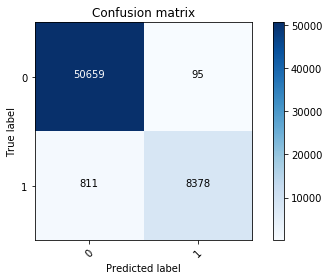

In [209]:
plot_confusion_matrix(cnf_matrix_unbalanced_reg, classes)
plt.show()

Despite having a significant (5 to 1) class imbalance, it seems the logistic regression performed quite well on this without any fine-tuning. The false negative are much more numerous the false positives here, which I believe to be the result of this class imbalance. Indeed, the classifier is more likely to mislabel loans who have now defaulted as defaulted considering it has seen much more loans who have defaulted.

Confusion matrix, without normalization
[[50253   501]
 [  444  8745]]


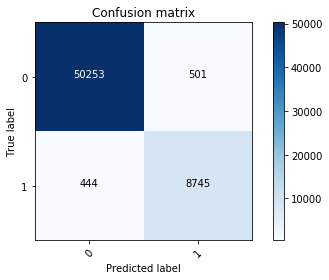

In [210]:
plot_confusion_matrix(cnf_matrix_balanced_reg, classes)
plt.show()

In [ ]:
Precision = cnf_matrix_balanced_reg[0,0]/

This is the result with the balanced logistic regression. On can see that the classifier is now better at predicting the defaults but has worsened when it comes to looking non-defaulting loans.

In [198]:
average_precision = average_precision_score(y_test, y_out)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


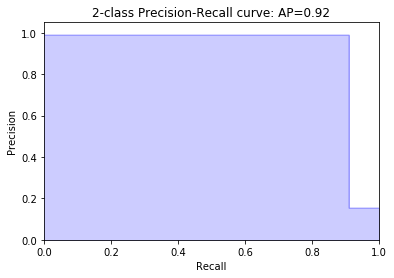

In [186]:
precision, recall, _ = precision_recall_curve(y_test, y_out)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.show()

Maybe one could also add the ROC curve to that.